In [4]:
import librosa
import sklearn
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import os
import re
import pandas as pd
import scipy
from scipy.stats import skew
import csv

In [14]:
#separate songs into groups
#load entire song to get full song duration
#load 30 seconds of song at 30 second offset
#group 1
y, sr = librosa.load('02 - Bolt Thrower - Eternal War.mp3')
btdur1 = librosa.get_duration(y=y, sr=sr)
bt1, btsr1 = librosa.load('02 - Bolt Thrower - Eternal War.mp3', offset=30, duration=30)
y, sr = librosa.load('03 - Bolt Thrower - Through The Eye Of Terror.mp3')
btdur2 = librosa.get_duration(y=y, sr=sr)
bt2, btsr2 = librosa.load('03 - Bolt Thrower - Through The Eye Of Terror.mp3', offset=30, duration=30)
y, sr = librosa.load('04 - Bolt Thrower - Dark Millennium.mp3')
btdur3 = librosa.get_duration(y=y, sr=sr)
bt3, btsr3 = librosa.load('04 - Bolt Thrower - Dark Millennium.mp3', offset=30, duration=30)
y, sr = librosa.load('HELLSHOCK - Shadows Of The Afterworld - 01 Afterworld.mp3')
btdur4 = librosa.get_duration(y=y, sr=sr)
bt4, btsr4 = librosa.load('HELLSHOCK - Shadows Of The Afterworld - 01 Afterworld.mp3', offset=30, duration=30)
y, sr = librosa.load('HELLSHOCK - Shadows Of The Afterworld - 02 Night Terrors.mp3')
btdur5 = librosa.get_duration(y=y, sr=sr)
bt5, btsr5 = librosa.load('HELLSHOCK - Shadows Of The Afterworld - 02 Night Terrors.mp3', offset=30, duration=30)
y, sr = librosa.load('HELLSHOCK - Shadows Of The Afterworld - 03 Quantum Sickness.mp3')
btdur6 = librosa.get_duration(y=y, sr=sr)
bt6, btsr6 = librosa.load('HELLSHOCK - Shadows Of The Afterworld - 03 Quantum Sickness.mp3', offset=30, duration=30)

#group 2
y, sr = librosa.load('01 - You Know My Steez.mp3')
osrapdur1 = librosa.get_duration(y=y, sr=sr)
osrap1, osrapsr1 = librosa.load('01 - You Know My Steez.mp3', offset=30, duration=30)
y, sr = librosa.load('02 - Robbin Hood Theory.mp3')
osrapdur2 = librosa.get_duration(y=y, sr=sr)
osrap2, osrapsr2 = librosa.load('02 - Robbin Hood Theory.mp3', offset=30, duration=30)
y, sr = librosa.load('03 - Work.mp3')
osrapdur3 = librosa.get_duration(y=y, sr=sr)
osrap3, osrapsr3 = librosa.load('03 - Work.mp3', offset=30, duration=30)
y, sr = librosa.load("01 GZAGenius - Liquid Swords (Feat. RZA).mp3")
osrapdur4 = librosa.get_duration(y=y, sr=sr)
osrap4, osrapsr4 = librosa.load("01 GZAGenius - Liquid Swords (Feat. RZA).mp3", offset=30, duration=30)
y, sr = librosa.load("02 GZAGenius - Duel Of The Iron Mic (Feat. Ol' Dirty Bastard & Inspectah Deck and Masta Killa).mp3")
osrapdur5 = librosa.get_duration(y=y, sr=sr)
osrap5, osrapsr5 = librosa.load("02 GZAGenius - Duel Of The Iron Mic (Feat. Ol' Dirty Bastard & Inspectah Deck and Masta Killa).mp3", offset=30, duration=30)
y, sr = librosa.load("08 GZAGenius - Shadowboxin' (Feat. Method Man).mp3")
osrapdur6 = librosa.get_duration(y=y, sr=sr)
osrap6, sr6 = librosa.load("08 GZAGenius - Shadowboxin' (Feat. Method Man).mp3", offset=30, duration=30)

#group 3
y, sr = librosa.load('02 - Unrecorded.mp3')
edur1 = librosa.get_duration(y=y, sr=sr)
e1, esr1 = librosa.load('02 - Unrecorded.mp3', offset=30, duration=30)
y, sr = librosa.load('05 - America.mp3')
edur2 = librosa.get_duration(y=y, sr=sr)
e2, esr2 = librosa.load('05 - America.mp3', offset=30, duration=30)
y, sr = librosa.load('08 - Be Wild.mp3')
edur3 = librosa.get_duration(y=y, sr=sr)
e3, esr3 = librosa.load('08 - Be Wild.mp3', offset=30, duration=30)
y, sr = librosa.load('04 - Blankets Of Night.mp3')
edur4 = librosa.get_duration(y=y, sr=sr)
e4, esr4 = librosa.load('04 - Blankets Of Night.mp3', offset=30, duration=30)
y, sr = librosa.load('06 - Miles To Go Before Sleep.mp3')
edur5 = librosa.get_duration(y=y, sr=sr)
e5, esr5 = librosa.load('06 - Miles To Go Before Sleep.mp3')
y, sr = librosa.load('07 - Wish.mp3')
edur6 = librosa.get_duration(y=y, sr=sr)
e6, esr6 = librosa.load('07 - Wish.mp3', offset=30, duration=30)

C:\Users\Brian\AppData\Local\Programs\Python\Python38\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
C:\Users\Brian\AppData\Local\Programs\Python\Python38\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [15]:
#print("mfcc: ", librosa.feature.mfcc(y=bt1, sr=sr1))
#print("sc: ", librosa.feature.spectral_centroid(y=bt1, sr=sr1))
#print("zcr: ", librosa.feature.zero_crossing_rate(y=bt1))
#print("cf: ", librosa.feature.chroma_stft(y=bt1, sr=sr1))
#print("sro: ", librosa.feature.spectral_rolloff(y=bt1, sr=sr1))
durationlist1 = [btdur1, btdur2, btdur3, btdur4, btdur5, btdur6]
durationlist2 = [osrapdur1, osrapdur2, osrapdur3, osrapdur4, osrapdur5, osrapdur6]
durationlist3 = [edur1, edur2, edur3, edur4, edur5, edur6]
btmfcc1 = librosa.feature.mfcc(y=bt1, sr=btsr1, n_mfcc=15)
btmfcc2 = librosa.feature.mfcc(y=bt2, sr=btsr2, n_mfcc=15)
btmfcc3 = librosa.feature.mfcc(y=bt3, sr=btsr3, n_mfcc=15)
btmfcc4 = librosa.feature.mfcc(y=bt4, sr=btsr4, n_mfcc=15)
btmfcc5 = librosa.feature.mfcc(y=bt5, sr=btsr5, n_mfcc=15)
btmfcc6 = librosa.feature.mfcc(y=bt6, sr=btsr6, n_mfcc=15)
sc1 = librosa.feature.spectral_centroid(y=bt1, sr=sr1)
sc3 = librosa.feature.spectral_centroid(y=osrap1, sr=sr3)
zcr1 = librosa.feature.zero_crossing_rate(y=bt2)
zcr3 = librosa.feature.zero_crossing_rate(y=osrap1)
cf1 = librosa.feature.chroma_stft(y=bt1, sr=sr1)
sro1 = librosa.feature.spectral_rolloff(y=bt1, sr=sr1)

#print(sr1, sr2)
#print(mfcc1.shape, sc1.shape, zcr1.shape, cf1.shape, sro1.shape)
print(zcr1, zcr3)
print(np.mean(zcr1), np.mean(zcr3))
#print(mfcc3)

NameError: name 'sr1' is not defined

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

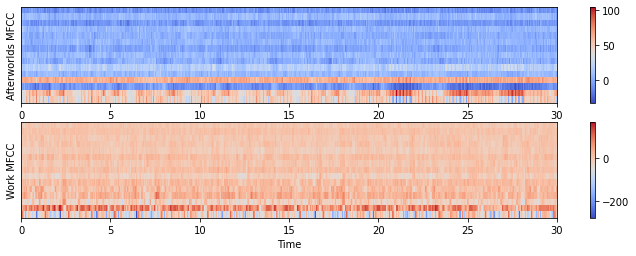

In [41]:
plt.figure(figsize=(12,6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc2, sr=sr1, x_axis='time')
plt.ylabel('Afterworlds MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(mfcc3, sr=sr3, x_axis='time')
plt.ylabel('Work MFCC')
plt.colorbar()

plt.tight_layout

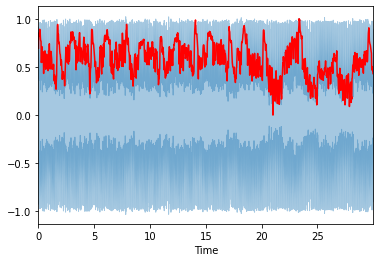

In [42]:
sc = librosa.feature.spectral_centroid(y=bt2, sr=sr1)[0]

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

frames = range(len(sc))
t = librosa.frames_to_time(frames)

librosa.display.waveplot(bt2, sr=sr1, alpha=0.4)
plt.plot(t, normalize(sc), color='r') # normalize for visualization purposes

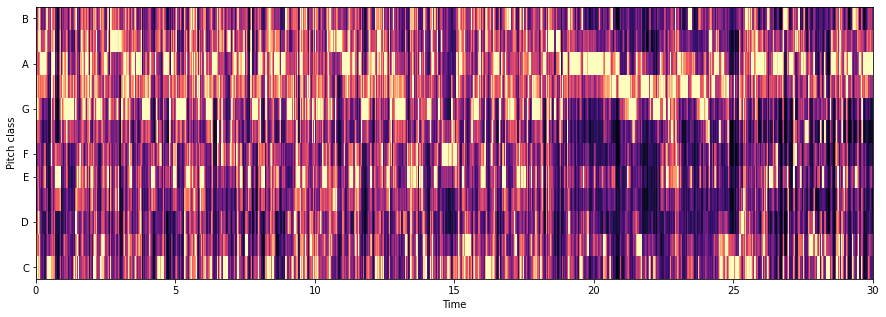

In [20]:
hop_length = 512
chroma = librosa.feature.chroma_stft(y=bt2, sr=btsr2)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma, sr=btsr2, x_axis='time', y_axis='chroma', hop_length=hop_length)

In [5]:
#print(os.getcwd())
#start header string for csv
header = 'group songname'
#all extracted audio features besides song duration have their mean, standard deviation, skew, max, median, and min values
#first 15 values for mfcc
for i in range(1, 16):
    header += f' mfcc{i}_mean'
    header += f' mfcc{i}_std'
    header += f' mfcc{i}_skew'
    header += f' mfcc{i}_max'
    header += f' mfcc{i}_median'
    header += f' mfcc{i}_min'
header += ' sc_mean sc_std sc_skew sc_max sc_median sc_min zcr_mean zcr_std zcr_skew zcr_max zcr_median zcr_min cf_mean cf_std cf_skew'
header += ' cf_max cf_median cf_min sro_mean sro_std sro_skew sro_max sro_median sro_min duration'
#split header by spaces so each string is own entry
header = header.split()

#open csv file for writing
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    #write header
    writer.writerow(header)
#each group has a folder with the same group name
groups = 'group1 group2 group3 group4 group5'.split()
#for each group folder navigate all the files
for g in groups:
    for filename in os.listdir(f'{g}'):
        group = g
        #get relative path for song file
        songname = f'{g}/{filename}'
        #remove all details but song title
        songsub = re.sub(r"^(.*) - ", "", songname)
        #replace spaces with underscores for csv file purposes
        songtitle = re.sub(r"\s+", "_", songsub)
        #load 30 seconds of song from a 30 second offset (song starts at 00:30)
        y, sr = librosa.load(songname, offset=30, duration=30)
        #also load full song just to grab total song duration, there's probably a better way than to load the song twice
        ydur, srdur = librosa.load(songname)
        #start string containing values for csv row
        to_append = f'{group} {songtitle}'
        #print(group, songtitle)
        #get first 15 mfccs from song
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=15)
        #get values from each of the 15 mfccs
        for e in mfcc:
            to_append += f' {np.mean(e)}'
            to_append += f' {np.std(e)}'
            to_append += f' {skew(e)}'
            to_append += f' {np.max(e)}'
            to_append += f' {np.median(e)}'
            to_append += f' {np.min(e)}'
            #print('mean = ', np.mean(e), ' std = ', np.std(e), 'skew = ', skew(e), 'max = ', np.max(e), 'median = ', np.median(e), 'min = ', np.min(e))
        #get spectral centroid values    
        sc = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
        to_append += f' {np.mean(sc)}'
        to_append += f' {np.std(sc)}'
        to_append += f' {skew(sc, nan_policy="omit")}'
        to_append += f' {np.max(sc)}'
        to_append += f' {np.median(sc)}'
        to_append += f' {np.min(sc)}'
        #print('mean = ', np.mean(sc), ' std = ', np.std(sc), 'skew = ', skew(sc), 'max = ', np.max(sc), 'median = ', np.median(sc), 'min = ', np.min(sc))
        #get zero crossing rate values
        zcr = librosa.feature.zero_crossing_rate(y=y)[0]
        to_append += f' {np.mean(zcr)}'
        to_append += f' {np.std(zcr)}'
        to_append += f' {skew(zcr, nan_policy="omit")}'
        to_append += f' {np.max(zcr)}'
        to_append += f' {np.median(zcr)}'
        to_append += f' {np.min(zcr)}'
        #get chroma frequencies values
        cf = librosa.feature.chroma_stft(y=y, sr=sr)[0]
        to_append += f' {np.mean(zcr)}'
        to_append += f' {np.std(zcr)}'
        to_append += f' {skew(zcr, nan_policy="omit")}'
        to_append += f' {np.max(zcr)}'
        to_append += f' {np.median(zcr)}'
        to_append += f' {np.min(zcr)}'
        #get spectral rolloff values
        sro = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
        to_append += f' {np.mean(sro)}'
        to_append += f' {np.std(sro)}'
        to_append += f' {skew(sro, nan_policy="omit")}'
        to_append += f' {np.max(sro)}'
        to_append += f' {np.median(sro)}'
        to_append += f' {np.min(sro)}'
        #get song duration
        sd = librosa.get_duration(y=ydur, sr=srdur)
        to_append += f' {sd}'
        #to_append = f'{group} {songtitle}'
        #for e in mfcc:
        #    to_append += f' {e}'
        #to_append += f' {sc} {zcr} {cf} {sro} {sd}'
        #re-open csv file for appending data
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            #write row containing all feature values of the current song
            writer.writerow(to_append.split())

C:\Users\Brian\AppData\Local\Programs\Python\Python38\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [4]:
#print(os.getcwd())
#start header string for csv
header = 'group songname'
#all extracted audio features besides song duration have their mean, standard deviation, skew, max, median, and min values
#first 15 values for mfcc
for i in range(1, 16):
    header += f' mfcc{i}_mean'
    header += f' mfcc{i}_std'
    header += f' mfcc{i}_skew'
    header += f' mfcc{i}_max'
    header += f' mfcc{i}_median'
    header += f' mfcc{i}_min'
header += ' sc_mean sc_std sc_skew sc_max sc_median sc_min zcr_mean zcr_std zcr_skew zcr_max zcr_median zcr_min cf_mean cf_std cf_skew'
header += ' cf_max cf_median cf_min sro_mean sro_std sro_skew sro_max sro_median sro_min'
#split header by spaces so each string is own entry
header = header.split()

#open csv file for writing
file = open('data2.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    #write header
    writer.writerow(header)
#each group has a folder with the same group name
groups = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
#for each group folder navigate all the files
for g in groups:
    for filename in os.listdir(f'genres/{g}'):
        try:
            group = g
            #get relative path for song file
            songname = f'genres/{g}/{filename}'
            #remove all details but song title
            songsub = re.sub(r"^(.*) - ", "", songname)
            #replace spaces with underscores for csv file purposes
            songtitle = re.sub(r"\s+", "_", songsub)
            #load 30 seconds of song from a 30 second offset (song starts at 00:30)
            y, sr = librosa.load(songname)
            #also load full song just to grab total song duration, there's probably a better way than to load the song twice
            #ydur, srdur = librosa.load(songname)
            #start string containing values for csv row
            to_append = f'{group} {songtitle}'
            #print(group, songtitle)
            #get first 15 mfccs from song
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=15)
            #get values from each of the 15 mfccs
            for e in mfcc:
                to_append += f' {np.mean(e)}'
                to_append += f' {np.std(e)}'
                to_append += f' {skew(e)}'
                to_append += f' {np.max(e)}'
                to_append += f' {np.median(e)}'
                to_append += f' {np.min(e)}'
                #print('mean = ', np.mean(e), ' std = ', np.std(e), 'skew = ', skew(e), 'max = ', np.max(e), 'median = ', np.median(e), 'min = ', np.min(e))
            #get spectral centroid values    
            sc = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
            to_append += f' {np.mean(sc)}'
            to_append += f' {np.std(sc)}'
            to_append += f' {skew(sc, nan_policy="omit")}'
            to_append += f' {np.max(sc)}'
            to_append += f' {np.median(sc)}'
            to_append += f' {np.min(sc)}'
            #print('mean = ', np.mean(sc), ' std = ', np.std(sc), 'skew = ', skew(sc), 'max = ', np.max(sc), 'median = ', np.median(sc), 'min = ', np.min(sc))
            #get zero crossing rate values
            zcr = librosa.feature.zero_crossing_rate(y=y)[0]
            to_append += f' {np.mean(zcr)}'
            to_append += f' {np.std(zcr)}'
            to_append += f' {skew(zcr, nan_policy="omit")}'
            to_append += f' {np.max(zcr)}'
            to_append += f' {np.median(zcr)}'
            to_append += f' {np.min(zcr)}'
            #get chroma frequencies values
            cf = librosa.feature.chroma_stft(y=y, sr=sr)[0]
            to_append += f' {np.mean(zcr)}'
            to_append += f' {np.std(zcr)}'
            to_append += f' {skew(zcr, nan_policy="omit")}'
            to_append += f' {np.max(zcr)}'
            to_append += f' {np.median(zcr)}'
            to_append += f' {np.min(zcr)}'
            #get spectral rolloff values
            sro = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
            to_append += f' {np.mean(sro)}'
            to_append += f' {np.std(sro)}'
            to_append += f' {skew(sro, nan_policy="omit")}'
            to_append += f' {np.max(sro)}'
            to_append += f' {np.median(sro)}'
            to_append += f' {np.min(sro)}'
            #get song duration
            #sd = librosa.get_duration(y=ydur, sr=srdur)
            #to_append += f' {sd}'
            #to_append = f'{group} {songtitle}'
            #for e in mfcc:
            #    to_append += f' {e}'
            #to_append += f' {sc} {zcr} {cf} {sro} {sd}'
            #re-open csv file for appending data
            file = open('data2.csv', 'a', newline='')
            with file:
                writer = csv.writer(file)
                #write row containing all feature values of the current song
                writer.writerow(to_append.split())
        except:
            print("File won't load: ", songname)
            continue


C:\Users\Brian\AppData\Local\Programs\Python\Python38\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Bad file


In [5]:
df = pd.read_csv('data.csv')
df1 = df.drop('songname', axis=1)
df2 = df1.drop('group', axis=1)
df2
#df1.drop(group, axis=1)
#df1.drop(songname, axis=1)
#df1

,mfcc1_mean,mfcc1_std,mfcc1_skew,mfcc1_max,mfcc1_median,mfcc1_min,mfcc2_mean,mfcc2_std,mfcc2_skew,mfcc2_max,...,cf_max,cf_median,cf_min,sro_mean,sro_std,sro_skew,sro_max,sro_median,sro_min,duration
0,-18.298019,46.606491,-1.424424,45.323887,-3.931686,-140.353104,74.180908,15.314893,0.692070,135.580444,...,0.212891,0.116211,0.035156,5738.515300,1015.231178,-0.439543,9087.011719,6050.830078,3509.912109,220.264490
1,-24.902538,21.305458,0.188913,35.459721,-27.056831,-81.732071,75.358948,12.679920,-0.060204,112.505463,...,0.257812,0.097168,0.033203,5755.890195,839.432157,0.161695,8979.345703,5808.581543,3391.479492,257.906939
2,-64.225616,30.212944,-1.385708,-3.139544,-57.033905,-163.868622,77.211555,20.386330,0.842268,145.074432,...,0.348145,0.124512,0.050293,5796.598282,1015.267879,-0.162116,8903.979492,5889.331055,3423.779297,127.773333
3,-38.767323,27.453985,0.274872,43.726345,-43.531418,-125.894386,78.238953,15.703918,-0.758902,134.765823,...,0.451172,0.110352,0.046387,5602.932786,1152.995732,0.802016,9582.275391,5609.399414,2982.348633,237.609796
4,-116.067070,41.591587,-0.656567,-40.033092,-102.949844,-241.337906,108.224037,32.988300,0.534402,183.440033,...,0.177734,0.100586,0.033691,4442.573136,1066.148350,0.437662,7364.355469,4274.340820,2433.251953,262.066667
5,-21.383572,24.927994,0.251713,50.496117,-22.800465,-79.144745,79.249977,15.976707,-0.017437,125.697876,...,0.302246,0.090820,0.027832,5453.842021,874.334713,0.429745,9205.444336,5361.767578,3154.614258,244.506122
6,-69.793976,21.460505,0.001501,-18.160170,-71.282928,-131.174225,82.350792,14.149572,-0.566601,116.781296,...,0.310059,0.105957,0.050293,5462.775301,1072.594123,0.412489,8430.249023,5394.067383,3380.712891,178.666667
7,-45.348686,38.561249,-1.631044,30.844635,-39.006111,-314.991089,90.519844,20.031439,0.083304,200.514267,...,0.236816,0.084473,0.011719,4805.379276,967.870089,0.214244,7568.920898,4500.439453,968.994141,199.575510
8,-23.301876,28.615543,-0.108435,41.911625,-20.674522,-89.341560,87.470657,16.943678,-0.873485,128.096344,...,0.365234,0.095215,0.036621,5175.510371,1221.756833,0.753744,9539.208984,5162.585449,3122.314453,195.500408
9,44.711647,14.699034,-0.945996,79.535240,46.506207,-18.930550,58.069054,14.402981,0.388844,105.112366,...,0.238281,0.138672,0.053223,5404.442320,393.384205,0.431153,6750.659180,5361.767578,4242.041016,236.773832


In [6]:
df0 = pd.read_csv('data2.csv')
df01 = df0.drop('songname', axis=1)
df02 = df01.drop('group', axis=1)
df02
#df1.drop(group, axis=1)
#df1.drop(songname, axis=1)
#df1

,mfcc1_mean,mfcc1_std,mfcc1_skew,mfcc1_max,mfcc1_median,mfcc1_min,mfcc2_mean,mfcc2_std,mfcc2_skew,mfcc2_max,...,cf_skew,cf_max,cf_median,cf_min,sro_mean,sro_std,sro_skew,sro_max,sro_median,sro_min
0,-113.570648,50.638004,0.044630,21.742058,-115.417656,-257.911011,121.571793,17.202147,-0.299414,164.754761,...,1.427675,0.242676,0.078125,0.033203,3805.839606,949.476395,1.012675,7644.287109,3649.877930,1830.322266
1,-207.501694,88.116714,-0.468996,-25.956675,-195.368332,-448.555634,123.991264,23.669811,-0.243202,192.770782,...,2.363820,0.323730,0.047852,0.006348,3550.522098,1725.657379,0.445773,8085.717773,3219.213867,333.764648
2,-90.722595,57.611153,-0.577687,32.401398,-85.377701,-343.934814,140.446304,22.555820,-1.330709,198.838501,...,4.185553,0.440918,0.073730,0.012695,3042.260232,885.457204,0.609613,6556.860352,2906.982422,441.430664
3,-199.544205,74.212646,0.049742,-14.066173,-196.836212,-363.953613,150.090897,21.365986,0.115523,235.073914,...,1.073028,0.145020,0.030762,0.006348,2184.745799,1221.963322,1.246766,7611.987305,1905.688477,387.597656
4,-160.337708,72.078377,-0.311698,-6.147505,-156.697556,-356.302917,126.219643,29.219597,-0.737367,188.284653,...,1.938532,0.366211,0.092773,0.039551,3579.757627,1254.184130,0.327905,7084.423828,3542.211914,1152.026367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-153.640961,50.407833,-0.253830,-27.139015,-149.504349,-299.740051,109.864647,21.344318,-0.654522,162.580688,...,1.406124,0.318848,0.084473,0.021973,4253.557033,1105.631374,1.080529,7902.685547,3951.342773,1894.921875
995,-142.392029,57.291874,-1.547037,-40.699062,-129.961533,-372.217834,116.189629,18.588139,-0.160136,169.850281,...,-0.306379,0.195312,0.098145,0.011719,4149.338328,1023.044874,0.532939,7396.655273,3994.409180,1550.390625
996,-124.952271,41.007790,-0.811610,-30.154749,-121.793182,-286.807953,115.177155,21.796515,-0.793714,175.609192,...,0.811464,0.314453,0.122559,0.026367,4031.405321,896.780597,1.541647,7515.087891,3865.209961,2077.954102
997,-225.007751,103.761108,-1.389464,-67.944344,-193.508499,-533.670105,123.646767,22.199530,-0.802857,175.622925,...,1.362758,0.193848,0.042969,0.008789,3015.631004,1154.431334,0.948697,7568.920898,2842.382812,495.263672


In [185]:
print(df2.shape)

(60, 115)


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = df2
y = df['group']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=50).fit(x_scaled)
x_pca = pca.transform(x_scaled)

print(sum(pca.explained_variance_ratio_))
print(x_pca.shape)

0.9981578941137783
(60, 50)


In [23]:
x0 = df02
y0 = df0['group']

scaler0 = StandardScaler()
x_scaled0 = scaler0.fit_transform(x0)

pca0 = PCA(n_components=50).fit(x_scaled0)
x_pca0 = pca0.transform(x_scaled0)

print(sum(pca0.explained_variance_ratio_))
print(x_pca0.shape)

0.9777439530584445
(999, 50)


In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

#x = df2.values
#y = df['group'].values

#print(x.shape)
#print(y)

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=.2, random_state=44, shuffle=True)

#rbf svc model with default gamma and c values
rbf = SVC(kernel= 'rbf', probability=True)

rbf.fit(x_train, y_train)

rbf_pred = rbf.predict(x_test)

cm_rbf = confusion_matrix(y_test, rbf_pred)

print(accuracy_score(rbf.predict(x_test),y_test))
print(cm_rbf)


0.8333333333333334
[[5 0 0 0 0]
 [0 1 0 0 0]
 [0 0 2 0 0]
 [0 0 1 1 0]
 [0 0 1 0 1]]


In [17]:
#possible values for SVC parameters
c_grid = [0.001, 0.01, 0.1, 1, 10]
gamma_grid = [0.001, 0.01, 0.1, 1, 10]
kernel_grid = ['rbf', 'poly', 'linear']
decision_grid = ['ovo', 'ovr']
degree_grid = [3, 4, 5, 6]
param_grid = {'kernel': kernel_grid, 'degree': degree_grid, 'C': c_grid, 'gamma' : gamma_grid, 'decision_function_shape': decision_grid}

#use cross validation to see which params end up the best
grid = GridSearchCV(SVC(), param_grid, scoring = "accuracy")
grid.fit(x_train, y_train)

#find best model
print(grid.best_score_)

print(grid.best_params_)

print(grid.best_estimator_)

0.6866666666666665
{'C': 0.01, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 0.001, 'kernel': 'linear'}
SVC(C=0.01, decision_function_shape='ovo', gamma=0.001, kernel='linear')


In [18]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(x_pca0, y0, test_size=.2, random_state=44, shuffle=True)

#possible values for SVC parameters
c_grid0 = [0.001, 0.01, 0.1, 1, 10]
gamma_grid0 = [0.001, 0.01, 0.1, 1, 10]
kernel_grid0 = ['rbf', 'poly', 'linear']
decision_grid0 = ['ovo', 'ovr']
degree_grid0 = [3, 4, 5, 6]
param_grid0 = {'kernel': kernel_grid0, 'degree': degree_grid0, 'C': c_grid0, 'gamma' : gamma_grid0, 'decision_function_shape': decision_grid0}

#use cross validation to see which params end up the best
grid0 = GridSearchCV(SVC(), param_grid0, scoring = "accuracy")
grid0.fit(x_train0, y_train0)

#find best model
print(grid0.best_score_)

print(grid0.best_params_)

print(grid0.best_estimator_)

In [17]:
#optimal svc settings
linear = SVC(kernel='linear', C = .01, decision_function_shape='ovo', probability=True)
linear.fit(x_train, y_train)

linear_pred = linear.predict(x_test)

cm_linear = confusion_matrix(y_test, linear_pred)

print(accuracy_score(linear.predict(x_test),y_test))
print(cm_linear)

0.8333333333333334
[[5 0 0 0 0]
 [0 1 0 0 0]
 [0 0 2 0 0]
 [0 0 1 1 0]
 [0 0 1 0 1]]


In [24]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(x_pca0, y0, test_size=.2, random_state=44, shuffle=True)
#optimal svc settings
rbf0 = SVC(kernel='rbf', C = 5, probability=True)
rbf0.fit(x_train0, y_train0)

rbf_pred0 = rbf0.predict(x_test0)

cm_rbf0 = confusion_matrix(y_test0, rbf_pred0)

print(accuracy_score(rbf0.predict(x_test0),y_test0))
print(cm_rbf0)

0.715
[[17  0  2  0  0  0  4  0  0  2]
 [ 0 19  1  0  0  0  0  0  0  0]
 [ 0  0 21  3  0  1  0  0  1  1]
 [ 0  0  0  9  2  1  1  0  0  1]
 [ 0  0  0  0 10  0  1  0  4  0]
 [ 0  3  0  1  0  8  0  0  0  0]
 [ 3  0  0  2  0  0 23  0  0  0]
 [ 0  0  4  0  0  0  0 13  1  3]
 [ 1  0  2  3  2  0  0  0 15  0]
 [ 1  0  1  1  1  1  0  1  1  8]]


<AxesSubplot:>

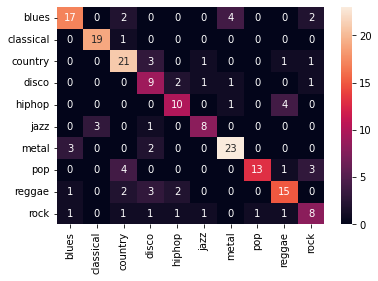

In [32]:
import seaborn as sns

results = pd.DataFrame(cm_rbf0)

results = results.rename(columns={0: "blues", 1: "classical", 2: "country", 3: "disco", 4: "hiphop", 5: "jazz", 6: "metal", 7: "pop", 8: "reggae", 9: "rock"})
results = results.rename(index={0: "blues", 1: "classical", 2: "country", 3: "disco", 4: "hiphop", 5: "jazz", 6: "metal", 7: "pop", 8: "reggae", 9: "rock"})

sns.heatmap(results, annot=True)
